In [25]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'limit': 10
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    json_ = response.json()
    with open('data.json', 'w') as f:
        json.dump(json_, f)
    #data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [26]:
import json

In [32]:
import json
 
with open("data.json", "r") as file:
    data = json.load(file)
 
    print("Data retrieved")

Data retrieved


In [54]:
list_ = []
for i in range(len(data['data'])):
    cryp_dict = {}
    cryp_dict['symbol'] = data['data'][i]['symbol']
    cryp_dict['max_supply'] = data['data'][i]['max_supply']
    cryp_dict['circulating_supply'] = data['data'][i]['circulating_supply']
    cryp_dict['total_supply'] = data['data'][i]['total_supply']
    cryp_dict['market_cap'] = data['data'][i]['quote']['USD']['market_cap']
    cryp_dict['price'] = data['data'][i]['quote']['USD']['price']
    cryp_dict['volume_24h'] = data['data'][i]['quote']['USD']['volume_24h']
    cryp_dict['percent_change_24h'] = data['data'][i]['quote']['USD']['percent_change_24h']
    cryp_dict['percent_change_7d'] = data['data'][i]['quote']['USD']['percent_change_7d']
    cryp_dict['percent_change_30d'] = data['data'][i]['quote']['USD']['percent_change_30d']
    cryp_dict['percent_change_60d'] = data['data'][i]['quote']['USD']['percent_change_60d']
    list_.append(cryp_dict)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
list_[0]['quote']['USD']

{'price': 20221.977367144213,
 'volume_24h': 31345607968.78571,
 'volume_change_24h': -17.1661,
 'percent_change_1h': 1.04416898,
 'percent_change_24h': -0.56015962,
 'percent_change_7d': -14.53049774,
 'percent_change_30d': -31.37844378,
 'percent_change_60d': -50.8488093,
 'percent_change_90d': -52.41224379,
 'market_cap': 385685685532.5947,
 'market_cap_dominance': 43.091,
 'fully_diluted_market_cap': 424661524710.03,
 'tvl': None,
 'last_updated': '2022-06-20T20:33:00.000Z'}

In [55]:
df = pd.DataFrame(list_)

In [56]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d
0,BTC,21000000.0,1.907260e+07,1.907260e+07,3.856857e+11,20221.977367,3.134561e+10,-0.560160,-14.530498,-31.378444,-50.848809
1,ETH,NaN,1.212456e+08,1.212456e+08,1.353806e+11,1116.580895,2.070480e+10,-0.364368,-11.989874,-43.591995,-63.110650
2,USDT,NaN,6.792430e+10,7.971062e+10,6.785551e+10,0.998987,5.322551e+10,0.001006,0.023489,0.022930,-0.118198
3,USDC,NaN,5.587557e+10,5.587557e+10,5.591003e+10,1.000617,5.617616e+09,-0.005352,-0.012432,0.017803,0.074769
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.509090e+10,214.916390,1.272261e+09,0.104625,-6.929177,-31.353922,-47.726998


<AxesSubplot:xlabel='symbol', ylabel='market_cap'>

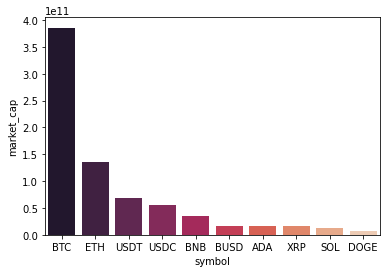

In [57]:
sns.barplot(x="symbol", y="market_cap", palette="rocket", data=df)

In [71]:
from datetime import datetime,timedelta

print(datetime.now().strftime('%Y-%m-%d'))
df['date'] = datetime.now().strftime('%Y-%m-%d')
df['date_24h'] = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
df['date_30d'] = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
df['date_60d'] = (datetime.now() - timedelta(days=60)).strftime('%Y-%m-%d')

2022-06-20


In [72]:
df.head()

,symbol,max_supply,circulating_supply,total_supply,market_cap,price,volume_24h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,date,date_24h,date_30d,date_60d
0,BTC,21000000.0,1.907260e+07,1.907260e+07,3.856857e+11,20221.977367,3.134561e+10,-0.560160,-14.530498,-31.378444,-50.848809,2022-06-20,2022-06-19,2022-05-21,2022-04-21
1,ETH,NaN,1.212456e+08,1.212456e+08,1.353806e+11,1116.580895,2.070480e+10,-0.364368,-11.989874,-43.591995,-63.110650,2022-06-20,2022-06-19,2022-05-21,2022-04-21
2,USDT,NaN,6.792430e+10,7.971062e+10,6.785551e+10,0.998987,5.322551e+10,0.001006,0.023489,0.022930,-0.118198,2022-06-20,2022-06-19,2022-05-21,2022-04-21
3,USDC,NaN,5.587557e+10,5.587557e+10,5.591003e+10,1.000617,5.617616e+09,-0.005352,-0.012432,0.017803,0.074769,2022-06-20,2022-06-19,2022-05-21,2022-04-21
4,BNB,165116760.0,1.632770e+08,1.632770e+08,3.509090e+10,214.916390,1.272261e+09,0.104625,-6.929177,-31.353922,-47.726998,2022-06-20,2022-06-19,2022-05-21,2022-04-21


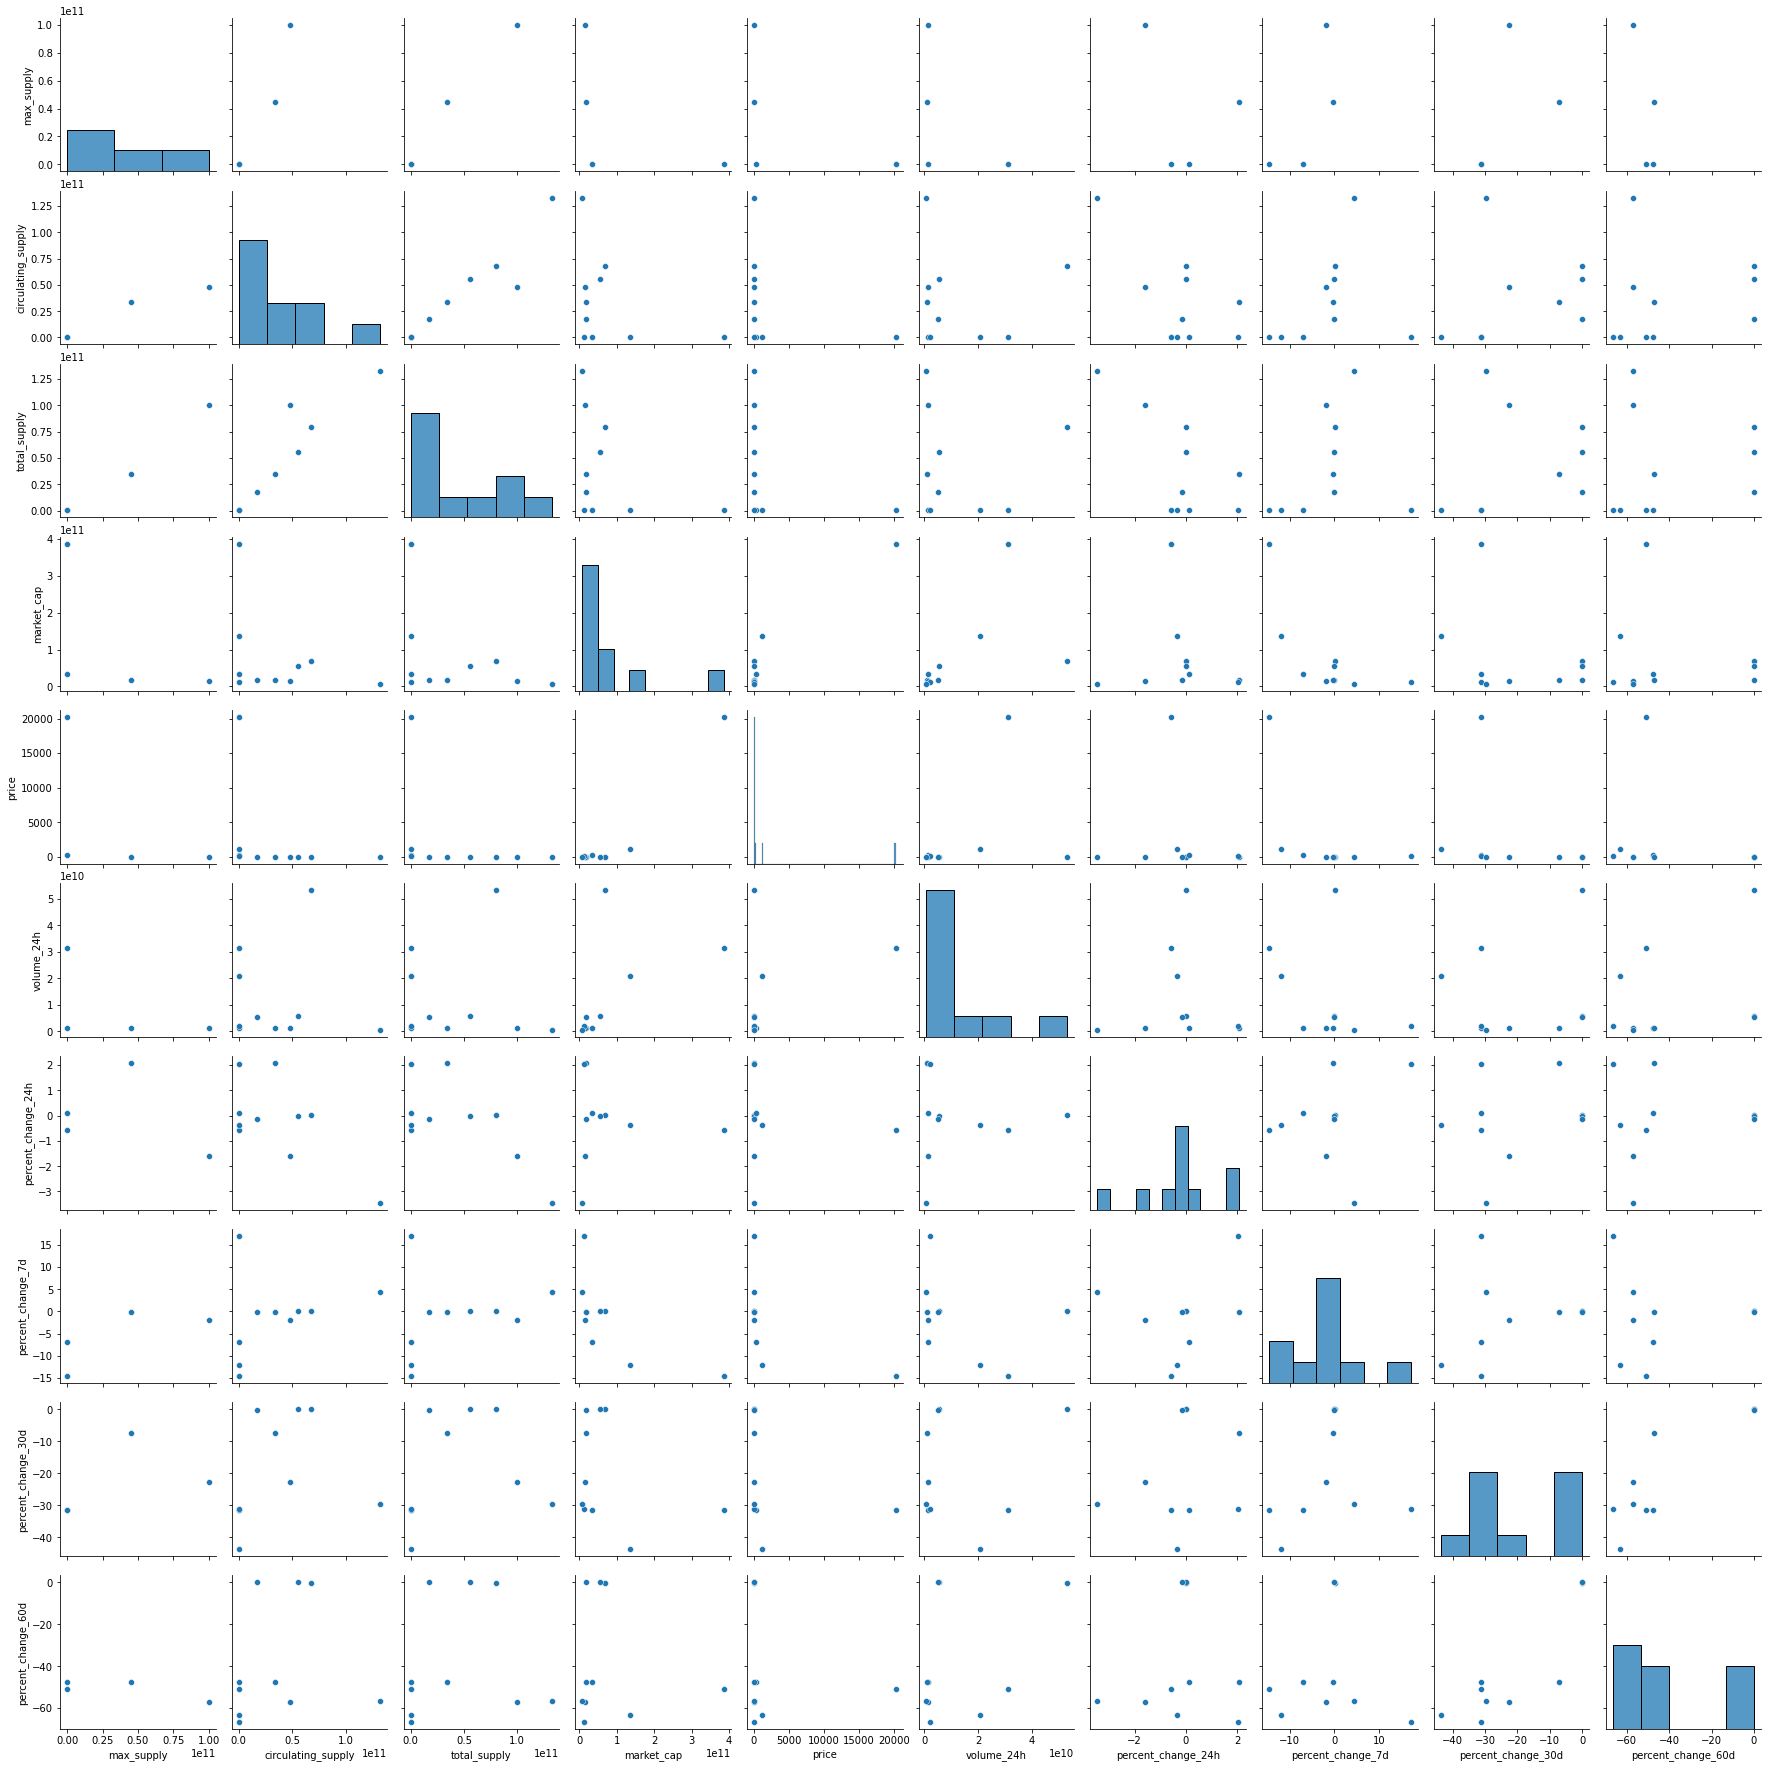

In [58]:
sns.pairplot(df)

<AxesSubplot:xlabel='symbol', ylabel='price'>

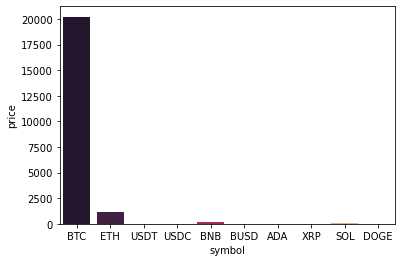

In [59]:
sns.barplot(x="symbol", y="price", palette="rocket", data=df)